## Package installation

In [1177]:
#package installation
! pip install pandas numpy matplotlib seaborn openpyxl
! pip install matplotlib seaborn


In [1178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Read raw data files

In [ ]:
# CSV Files
reviews_df = pd.read_csv("../../data/all_countries_reviews.csv")
trends_df = pd.read_csv("../../data/google_trends_data.csv")
currency_df = pd.read_csv("../../data/southeast_asia_currency_monthly_avg.csv")

# Excel File
visitors_df = pd.read_excel("../../data/monthly_num_visitors.xlsx")

# JSON Files

with open("../../data/sentiment_analysis(reddit).json", "r") as f:
    reddit_sentiment = json.load(f)

with open("../../data/sentiment_analysis_instagram_timed.json", "r") as f:
    instagram_sentiment = json.load(f)



FileNotFoundError: [Errno 2] No such file or directory: '../../data/all_countries_reviews.csv'

In [ ]:
# Explore sentiment data
print("\n--- Reddit Sentiment Analysis ---")
print(reddit_sentiment[0])

print("\n--- Instagram Sentiment Analysis ---")
print(instagram_sentiment[0])



--- Reddit Sentiment Analysis ---
{'submission_id': '1jjuq8t', 'author': 'Stock_Rabbit_1901', 'created_utc': '2024-04-09T12:57:21.441Z', 'month_year': '04-2024', 'name': 't3_1jjuq8t', 'num_comments': 5, 'score': 6, 'selftext': 'I’m going to China in May to visit a manufacturer in Jinan and we will go to Qingdao too. But before that, I’ll have around 6 nights to explore the country.\n\nI’d love to experience a side of China that’s totally different from Europe. I’m not into hiking, but I really want to discover and immerse myself in something unique and culturally rich.\n\nI’m currently torn between two possible routes:\n\t1.\tShanghai – Beijing – Hangzhou\nI likely won’t have time for all three, but I could probably fit in two.\n\t2.\tChengdu – Chongqing – Xi’an\nSame here — most likely just two cities.\n\nFor those of you who’ve been to these places: based on a 6-night trip, which combo would you recommend? I’m open to suggestions beyond these as well, keen to hear what you think wou

## Prepare reddit sentiment dataframe


In [ ]:
#convert to dataframe
reddit_df = pd.DataFrame(reddit_sentiment)
reddit_df.head(5)

,submission_id,author,created_utc,month_year,name,num_comments,score,selftext,subreddit_name,title,upvote_ratio,mentioned_countries,mentioned_cities,date_only,time_only,month,language,cleaned_caption,sentiment_score
0,1jjuq8t,Stock_Rabbit_1901,2024-04-09T12:57:21.441Z,04-2024,t3_1jjuq8t,5,6,I’m going to China in May to visit a manufactu...,travel,"China trip, advice for 6 nights",1.00,china,"beijing, hangzhou, shanghai",2024-04-09T00:00:00.000,12:57:21.441380,4,en,Im going to China in May to visit a manufactur...,0.9627
1,1j62q8v,OkMasterpiece260,2022-04-27T16:00:12.938Z,04-2022,t3_1j62q8v,6,0,Hey backpackers! My name is Caitlin and I’m cu...,backpacking,Come to Thailand with me!!,0.09,"singapore, thailand",singapore,2022-04-27T00:00:00.000,16:00:12.938550,4,en,Hey backpackers! My name is Caitlin and Im cur...,0.9905
2,1jcrmy9,Extension-Driver-136,2024-12-25T09:13:10.947Z,12-2024,t3_1jcrmy9,23,13,"Hello everyone, \n\nI would like some help ple...",solotravel,Budgeting for Gap Year in SEA - Help please,0.84,"vietnam, malaysia, thailand, indonesia, nepal,...",,2024-12-25T00:00:00.000,09:13:10.947906,12,en,"Hello everyone, I would like some help please!...",0.8974
3,1jeujdu,bonuccigang,2023-07-18T17:12:01.071Z,07-2023,t3_1jeujdu,0,1,"Hi all, I’m a 24 year old M looking to take a ...",solotravel,"Tips, advice and recommendations for my trip t...",0.67,"singapore, malaysia, thailand","kuala lumpur, singapore",2023-07-18T00:00:00.000,17:12:01.071821,7,en,"Hi all, Im a 24 year old M looking to take a 3...",0.9982
4,1jcv2ig,RubAdministrative515,2024-01-11T18:19:20.407Z,01-2024,t3_1jcv2ig,40,28,I am 19 and never left the country (USA). I a...,solotravel,Am I too ambitious for a first international t...,0.79,"china, japan, south_korea",,2024-01-11T00:00:00.000,18:19:20.407500,1,en,I am 19 and never left the country USA. I am p...,0.9021


In [ ]:
#keep only relevant columns
columns_to_keep = [
    "month_year",
    "mentioned_countries",
    "mentioned_cities",
    "sentiment_score",
]
reddit_df = reddit_df[columns_to_keep]
reddit_df.head(5)

,month_year,mentioned_countries,mentioned_cities,sentiment_score
0,04-2024,china,"beijing, hangzhou, shanghai",0.9627
1,04-2022,"singapore, thailand",singapore,0.9905
2,12-2024,"vietnam, malaysia, thailand, indonesia, nepal,...",,0.8974
3,07-2023,"singapore, malaysia, thailand","kuala lumpur, singapore",0.9982
4,01-2024,"china, japan, south_korea",,0.9021


In [ ]:
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month_year           819 non-null    object 
 1   mentioned_countries  819 non-null    object 
 2   mentioned_cities     819 non-null    object 
 3   sentiment_score      819 non-null    float64
dtypes: float64(1), object(3)
memory usage: 25.7+ KB


In [ ]:
# Align the month_year format with other datasets
reddit_df["month_year"] = pd.to_datetime(reddit_df["month_year"], errors="coerce")
reddit_df["month_year"] = reddit_df["month_year"].dt.strftime("%Y-%m")

/var/folders/85/3q25ml057m51x2d6fx8s4w740000gn/T/ipykernel_72636/2053625659.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  reddit_df["month_year"] = pd.to_datetime(reddit_df["month_year"], errors="coerce")


In [ ]:
## Since the country column contains a list of all relevant countries
## Parse the str countries into list first
reddit_df["mentioned_countries"] = reddit_df["mentioned_countries"].apply(
    lambda x: [c.strip().lower() for c in x.split(",")] if isinstance(x, str) else x
)
## Explode the list so as to aggregate based on individual countries
reddit_df_exploded = reddit_df.explode("mentioned_countries")
print("Before explode:", reddit_df.shape[0])
print("After explode:", reddit_df_exploded.shape[0])


Before explode: 819
After explode: 3029


In [ ]:
## aggregate individual country's average sentiment score
avg_sentiment = reddit_df_exploded.groupby(
    ["mentioned_countries", "month_year"]
)["sentiment_score"].mean().reset_index()
avg_sentiment.columns = ["country", "month_year", "reddit_sentiment"]
avg_sentiment['month_year'] = pd.to_datetime(avg_sentiment['month_year'])

In [ ]:
# capitalise the first letter so as to merge with other datasets on country
avg_sentiment["country"] = avg_sentiment["country"].str.title()
avg_sentiment.head(5)

,country,month_year,reddit_sentiment
0,Brunei,2022-03-01,0.9011
1,Brunei,2022-05-01,0.9011
2,Brunei,2022-06-01,0.9878
3,Brunei,2022-08-01,0.9878
4,Brunei,2022-09-01,0.2960


In [ ]:
##KIV: continue to parse the str cities into list if using cities
##reddit_df_exploded["mentioned_cities"] = reddit_df_exploded["mentioned_cities"].apply(
##    lambda x: [c.strip().lower() for c in x.split(",")] if isinstance(x, str) else x
##)
##reddit_df_exploded_cc = reddit_df_exploded.explode("mentioned_cities")
##print("Before explode:", reddit_df_exploded.shape[0])
##print("After explode:", reddit_df_exploded_cc.shape[0])

In [ ]:
# this sections inspect all the missing values in the reddit sentiment dataframe in details
avg_sentiment['month_year'] = pd.to_datetime(avg_sentiment['month_year'])

# Create full list of all months from Jan 2022 to Dec 2025
all_months = pd.date_range(start="2022-01-01", end="2025-01-01", freq='MS')

# Get all countries
all_countries = ['Brunei', 'Indonesia', 'Cambodia', 'Laos', 'Myanmar', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam']

# Create a full cartesian product of countries and months
full_index = pd.MultiIndex.from_product([all_countries, all_months], names=['country', 'month_year'])

# Reindex your data to check what's missing
complete_df = avg_sentiment.set_index(['country', 'month_year']).reindex(full_index)

# Show missing rows (i.e., where num_visitors is NaN)
missing_data = complete_df[complete_df['reddit_sentiment'].isna()]
print(f"Missing entries: {len(missing_data)}")
print(missing_data.head(50))

Missing entries: 50
                    reddit_sentiment
country month_year                  
Brunei  2022-01-01               NaN
        2022-02-01               NaN
        2022-04-01               NaN
        2022-07-01               NaN
        2022-10-01               NaN
        2022-12-01               NaN
        2023-01-01               NaN
        2023-03-01               NaN
        2023-05-01               NaN
        2023-10-01               NaN
        2023-11-01               NaN
        2023-12-01               NaN
        2024-01-01               NaN
        2024-04-01               NaN
        2024-06-01               NaN
        2024-08-01               NaN
Myanmar 2022-01-01               NaN
        2022-02-01               NaN
        2022-03-01               NaN
        2022-04-01               NaN
        2022-05-01               NaN
        2022-06-01               NaN
        2022-07-01               NaN
        2022-08-01               NaN
        2022-09-01

## Prepare instagram sentiment dataframe

In [ ]:
ig_df = pd.DataFrame(instagram_sentiment)
ig_df.head(5)

,caption,comment_count,date,like_count,play_count,country,date_only,time_only,month,cleaned_caption,language,sentiment_score
0,"Bandar Seri Begawan, the capital of the tiny o...",182,2025-01-05T21:20:35.000Z,3569,0,brunei,2025-01-05T00:00:00.000,21:20:35,1,"Bandar Seri Begawan, the capital of the tiny o...",en,0.9100
1,"Jerudong Park, Brunei, new year's eve 1996.\n\...",1,2024-08-08T04:37:02.000Z,103,0,brunei,2024-08-08T00:00:00.000,04:37:02,8,"Jerudong Park, Brunei, new years eve 1996. Mic...",en,0.0000
2,First time seeing a Unimog and it was quite th...,45,2023-08-24T16:36:23.000Z,635,0,brunei,2023-08-24T00:00:00.000,16:36:23,8,First time seeing a Unimog and it was quite th...,en,0.9792
3,Flowers are always the way to a woman’s heart!...,0,2024-05-14T05:27:27.000Z,3,217,brunei,2024-05-14T00:00:00.000,05:27:27,5,Flowers are always the way to a womans heart! ...,en,0.7712
4,"Hello, Brunei! My 69th country.\n\nUnsurprisin...",45,2025-02-06T16:54:56.000Z,2624,0,brunei,2025-02-06T00:00:00.000,16:54:56,2,"Hello, Brunei! My 69th country. Unsurprising f...",en,0.8619


In [ ]:
ig_df['country'].unique() # the countries are cities in fact

array(['brunei', 'cambodia', 'indonesia', 'laos', 'malaysia', 'myanmar',
       'philippines', 'singapore', 'thailand', 'vietnam'], dtype=object)

In [ ]:
# capitalise the first letter so as to merge with other datasets on country
ig_df["country"] = ig_df["country"].str.title()

#change month_year format to align with other datasets
ig_df['date_only'] = pd.to_datetime(ig_df['date_only'], errors='coerce')
ig_df['month_year'] = ig_df['date_only'].dt.strftime('%Y-%m')

#only keeping the sentiment score
columns_to_keep = [
    "month_year",
    "country",
    "sentiment_score"
]
ig_df = ig_df[columns_to_keep]

#agggregate sentiment score
ig_sentiment = ig_df.groupby(
    ["country", "month_year"]
)["sentiment_score"].mean().reset_index()
ig_sentiment.columns = ["country", "month_year", "ig_sentiment"]
ig_sentiment['month_year'] = pd.to_datetime(ig_sentiment['month_year'])
ig_sentiment.head(5)

,country,month_year,ig_sentiment
0,Brunei,2022-01-01,0.621856
1,Brunei,2022-02-01,0.647714
2,Brunei,2022-03-01,0.605562
3,Brunei,2022-04-01,0.533040
4,Brunei,2022-05-01,0.667885


In [ ]:
# this sections inspect all the missing values in the instagram sentiment dataframe in details

# Reindex your data to check what's missing
complete_df = ig_sentiment.set_index(['country', 'month_year']).reindex(full_index)

# Show missing rows (i.e., where num_visitors is NaN)
missing_data = complete_df[complete_df['ig_sentiment'].isna()]
print(f"Missing entries: {len(missing_data)}")
print(missing_data.head())

Missing entries: 0
Empty DataFrame
Columns: [ig_sentiment]
Index: []


## Prepare tripadvisor review dataframe

In [ ]:
# Convert trip_date to datetime and extract month-year
reviews_df["trip_date"] = pd.to_datetime(reviews_df["trip_date"], errors="coerce")
reviews_df["month_year"] = reviews_df["trip_date"].dt.strftime("%Y-%m")
columns_to_keep = [
    "month_year",
    "country",
    "rating"
]
reviews_df = reviews_df[columns_to_keep]

# aggregate to find average monthly rating
review_agg = reviews_df.groupby(["country", "month_year"])["rating"].mean().reset_index()
review_agg = review_agg.rename(columns={"rating": "trip_advisor_rating"})
review_agg['month_year'] = pd.to_datetime(review_agg['month_year'])
review_agg.head(5)

/var/folders/85/3q25ml057m51x2d6fx8s4w740000gn/T/ipykernel_72636/2329986590.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  reviews_df["trip_date"] = pd.to_datetime(reviews_df["trip_date"], errors="coerce")


,country,month_year,trip_advisor_rating
0,Brunei,2015-09-01,4.5
1,Brunei,2015-10-01,5.0
2,Brunei,2016-01-01,5.0
3,Brunei,2016-02-01,5.0
4,Brunei,2016-04-01,4.5


In [ ]:
# this sections inspect all the missing values in the tripadvisor review dataframe in details

# Ensure month_year is a proper datetime column
review_agg['month_year'] = pd.to_datetime(review_agg['month_year'])

# Create full list of all months from Jan 2022 to Dec 2025
all_months = pd.date_range(start="2022-01-01", end="2025-01-01", freq='MS')

# Get all countries from your dataset
all_countries = review_agg['country'].unique()

# Create a full cartesian product of countries and months
full_index = pd.MultiIndex.from_product([all_countries, all_months], names=['country', 'month_year'])

# Reindex your data to check what's missing
complete_df = review_agg.set_index(['country', 'month_year']).reindex(full_index)

# Show missing rows (i.e., where num_visitors is NaN)
missing_data = complete_df[complete_df['trip_advisor_rating'].isna()]
print(f"Missing entries: {len(missing_data)}")
print(missing_data.head(30))

Missing entries: 25
                    trip_advisor_rating
country month_year                     
Brunei  2022-01-01                  NaN
        2022-02-01                  NaN
        2022-03-01                  NaN
        2022-04-01                  NaN
        2022-05-01                  NaN
        2022-06-01                  NaN
        2022-07-01                  NaN
        2022-08-01                  NaN
        2022-09-01                  NaN
        2022-12-01                  NaN
        2023-01-01                  NaN
        2023-04-01                  NaN
        2023-05-01                  NaN
        2023-10-01                  NaN
        2023-11-01                  NaN
        2024-08-01                  NaN
        2024-09-01                  NaN
        2024-10-01                  NaN
        2024-11-01                  NaN
Myanmar 2022-08-01                  NaN
        2022-09-01                  NaN
        2024-01-01                  NaN
        2024-05-01  

In [ ]:
review_agg["country"].unique()

array(['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar',
       'Philippines', 'Thailand', 'Vietnam'], dtype=object)

## Prepare exchange rate dataframe

In [ ]:
#correct datetime format
currency_df["YearMonth"] = pd.to_datetime(currency_df["YearMonth"], errors="coerce")
currency_df["YearMonth"] = currency_df["YearMonth"].dt.strftime("%Y-%m")
currency_df = currency_df.rename(columns={
    "Currency": "country",
    "YearMonth": "month_year",
    "AverageRate": "avg_currency_rate"
})

unique_codes = currency_df["country"].unique()
print(sorted(unique_codes))

['BND', 'IDR', 'KHR', 'LAK', 'MMK', 'MYR', 'PHP', 'SGD', 'THB', 'VND']


In [ ]:
# map currency to country
currency_to_country = {
    "BND": "Brunei",
    "IDR": "Indonesia",
    "KHR": "Cambodia",
    "LAK": "Laos",
    "MMK": "Myanmar",
    "MYR": "Malaysia",
    "PHP": "Philippines",
    "SGD": "Singapore",
    "THB": "Thailand",
    "VND": "Vietnam"
}

currency_df["country"] = currency_df["country"].map(currency_to_country)
currency_df['month_year'] = pd.to_datetime(currency_df['month_year'])
currency_df.head()

,month_year,country,avg_currency_rate
0,2022-01-01,Brunei,1.351418
1,2022-01-01,Indonesia,14327.056094
2,2022-01-01,Cambodia,4072.629258
3,2022-01-01,Laos,11272.253421
4,2022-01-01,Myanmar,1777.280733


## Prepare google trend dataframe

In [ ]:
trend_df = trends_df.rename(columns={"value": "google_trend_score"})
trend_df['month_year'] = pd.to_datetime(trend_df['month_year'])
trend_df.head(5)

,month_year,country,google_trend_score
0,2021-12-01,Cambodia,1.0
1,2021-12-01,Indonesia,17.0
2,2021-12-01,Malaysia,12.0
3,2021-12-01,Myanmar,1.0
4,2021-12-01,Philippines,8.0


In [ ]:
trend_df["country"].unique()

array(['Cambodia', 'Indonesia', 'Malaysia', 'Myanmar', 'Philippines',
       'Singapore', 'Thailand', 'Vietnam'], dtype=object)

## Prepare number of visitors dataframe

In [ ]:
# --- Prepare visitors_df ---
visitors_df = visitors_df.rename(columns={"value": "num_visitors"})
visitors_df.head(5)

,country,month_year,num_visitors
0,Thailand,2022-01,134000.0
1,Thailand,2022-02,153000.0
2,Thailand,2022-03,211000.0
3,Thailand,2022-04,293000.0
4,Thailand,2022-05,521000.0


In [ ]:
visitors_df["country"].unique()

array(['Thailand', 'Singapore', 'Malaysia', 'Indonesia', 'Vietnam',
       'Philippines', 'Cambodia', 'Brunei', 'Myanmar', 'Laos'],
      dtype=object)

In [ ]:
# this sections inspect all the missing values in the num of visitors dataframe in details

# Ensure month_year is a proper datetime column
visitors_df['month_year'] = pd.to_datetime(visitors_df['month_year'])

# Create full list of all months from Jan 2022 to Dec 2025
all_months = pd.date_range(start="2022-01-01", end="2025-01-01", freq='MS')

# Get all countries from your dataset
all_countries = visitors_df['country'].unique()

# Create a full cartesian product of countries and months
full_index = pd.MultiIndex.from_product([all_countries, all_months], names=['country', 'month_year'])

# Reindex your data to check what's missing
complete_df = visitors_df.set_index(['country', 'month_year']).reindex(full_index)

# Show missing rows (i.e., where num_visitors is NaN)
missing_data = complete_df[complete_df['num_visitors'].isna()]
print(f"Missing entries: {len(missing_data)}")
print(missing_data.head(30))


Missing entries: 9
                        num_visitors
country     month_year              
Malaysia    2025-01-01           NaN
Indonesia   2025-01-01           NaN
Philippines 2022-01-01           NaN
Cambodia    2025-01-01           NaN
Brunei      2022-01-01           NaN
            2023-01-01           NaN
            2025-01-01           NaN
Myanmar     2025-01-01           NaN
Laos        2025-01-01           NaN


## Merge all dataframe

In [ ]:
final_df = (
    currency_df
    .merge(trend_df, how="left", on=["country", "month_year"])
    .merge(visitors_df, how="left", on=["country", "month_year"])
    .merge(review_agg, how="left", on=["country", "month_year"])
    .merge(avg_sentiment, how="left", on=["country", "month_year"])
    .merge(ig_sentiment, how="left", on=["country", "month_year"])
)

# Define the date range
start_date = pd.to_datetime("2022-01-01")
end_date = pd.to_datetime("2025-01-01")

# Filter the DataFrame
final_df = final_df[(final_df['month_year'] >= start_date) & (final_df['month_year'] <= end_date)]


# EDA

In [ ]:
final_df.head(10)

,month_year,country,avg_currency_rate,google_trend_score,num_visitors,trip_advisor_rating,reddit_sentiment,ig_sentiment
0,2022-01-01,Brunei,1.351418,NaN,NaN,NaN,NaN,0.621856
1,2022-01-01,Indonesia,14327.056094,12.0,122000.000000,5.000000,0.614100,0.561329
2,2022-01-01,Cambodia,4072.629258,2.0,44700.000000,5.000000,0.951489,0.027175
3,2022-01-01,Laos,11272.253421,NaN,117263.846577,5.000000,0.971214,0.569491
4,2022-01-01,Myanmar,1777.280733,1.0,11372.000000,5.000000,NaN,0.366821
5,2022-01-01,Malaysia,4.186455,13.0,30000.000000,4.200000,0.935486,0.434539
6,2022-01-01,Philippines,51.216984,11.0,NaN,4.666667,0.948633,0.519094
7,2022-01-01,Singapore,1.351418,31.0,57174.000000,NaN,0.893312,0.995350
8,2022-01-01,Thailand,33.276252,19.0,134000.000000,5.000000,0.783650,0.376772
9,2022-01-01,Vietnam,22748.329719,7.0,19727.000000,NaN,0.954355,0.445039


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 0 to 369
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month_year           370 non-null    datetime64[ns]
 1   country              370 non-null    object        
 2   avg_currency_rate    370 non-null    float64       
 3   google_trend_score   296 non-null    float64       
 4   num_visitors         361 non-null    float64       
 5   trip_advisor_rating  308 non-null    float64       
 6   reddit_sentiment     320 non-null    float64       
 7   ig_sentiment         370 non-null    float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 26.0+ KB


In [ ]:
final_df[["avg_currency_rate", "google_trend_score", "num_visitors", "trip_advisor_rating","reddit_sentiment","ig_sentiment"]].describe()

,avg_currency_rate,google_trend_score,num_visitors,trip_advisor_rating,reddit_sentiment,ig_sentiment
count,370.000000,296.000000,3.610000e+02,308.000000,320.000000,370.000000
mean,6394.544843,18.243243,7.809551e+05,4.703486,0.796617,0.463390
std,8816.631555,15.655235,7.836676e+05,0.380984,0.175842,0.162539
min,1.296503,1.000000,9.508000e+03,2.000000,-0.092100,-0.154717
25%,4.483026,6.750000,1.416460e+05,4.500000,0.697341,0.371149
50%,917.418825,15.000000,4.720000e+05,4.833333,0.848565,0.451329
75%,15015.356887,22.000000,1.230000e+06,4.979022,0.939485,0.551439
max,25464.406790,67.000000,3.710000e+06,5.000000,0.999200,0.995350


In [ ]:
final_df.shape

(370, 8)

In [ ]:
#check for missing values
cols_to_check = ["avg_currency_rate", "google_trend_score", "num_visitors", 
                 "trip_advisor_rating", "reddit_sentiment", "ig_sentiment"]

# Calculate percentage of missing values
missing_percentage = final_df[cols_to_check].isnull().mean() * 100

# Display nicely
print("Percentage of missing values in each column:")
print(missing_percentage.round(2))


Percentage of missing values in each column:
avg_currency_rate       0.00
google_trend_score     20.00
num_visitors            2.43
trip_advisor_rating    16.76
reddit_sentiment       13.51
ig_sentiment            0.00
dtype: float64


% missing values
google_trend_score     20.00   #Missing all Brunei and  Laos data
reddit_sentiment       13.51   #missing 50 entries from Myanmar and Brunei
num_visitors            6.92   #Missing entries: 9
                                country     month_year  num_visitors          
                                Malaysia    2025-01-01           NaN
                                Indonesia   2025-01-01           NaN
                                Philippines 2022-01-01           NaN
                                Cambodia    2025-01-01           NaN
                                Brunei      2022-01-01           NaN
                                            2023-01-01           NaN
                                            2025-01-01           NaN
                                Myanmar     2025-01-01           NaN
                                Laos        2025-01-01           NaN
trip_advisor_rating    16.76   #Missing entries: 25
                                country month_year  trip_advisor_rating                    
                                Brunei  2022-01-01                  NaN
                                        2022-02-01                  NaN
                                        2022-03-01                  NaN
                                        2022-04-01                  NaN
                                        2022-05-01                  NaN
                                        2022-06-01                  NaN
                                        2022-07-01                  NaN
                                        2022-08-01                  NaN
                                        2022-09-01                  NaN
                                        2022-12-01                  NaN
                                        2023-01-01                  NaN
                                        2023-04-01                  NaN
                                        2023-05-01                  NaN
                                        2023-10-01                  NaN
                                        2023-11-01                  NaN
                                        2024-08-01                  NaN
                                        2024-09-01                  NaN
                                        2024-10-01                  NaN
                                        2024-11-01                  NaN
                                Myanmar 2022-08-01                  NaN
                                        2022-09-01                  NaN
                                        2024-01-01                  NaN
                                        2024-05-01                  NaN
                                Vietnam 2022-01-01                  NaN
                                        2022-02-01                  NaN

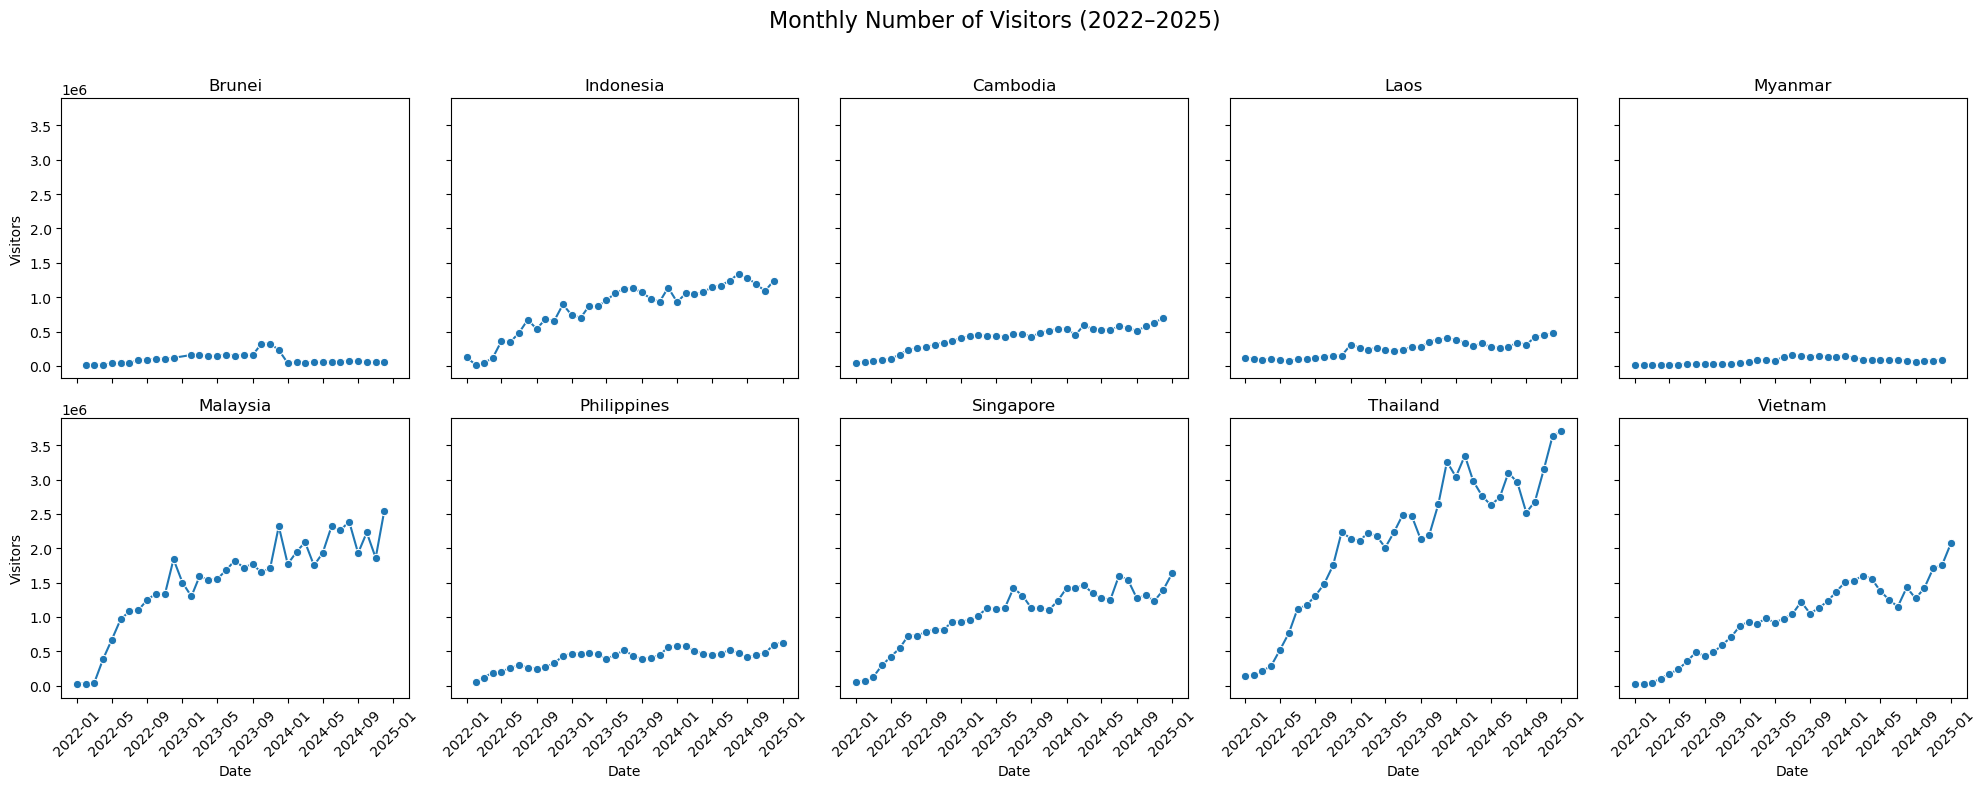

In [ ]:
# Get the list of countries (just in case it’s not sorted)
countries = final_df['country'].unique()

# Set up the plot grid (2 rows x 5 columns)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8), sharex=True, sharey=True)
axes = axes.flatten()  # Flatten to 1D for easy indexing

# Loop over each country and plot
for i, country in enumerate(countries):
    ax = axes[i]
    country_data = final_df[final_df['country'] == country]
    sns.lineplot(
        data=country_data,
        x='month_year',
        y='num_visitors',
        marker='o',
        ax=ax
    )
    ax.set_title(country)
    ax.set_xlabel("Date")
    ax.set_ylabel("Visitors")
    ax.tick_params(axis='x', rotation=45)

plt.suptitle("Monthly Number of Visitors (2022–2025)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


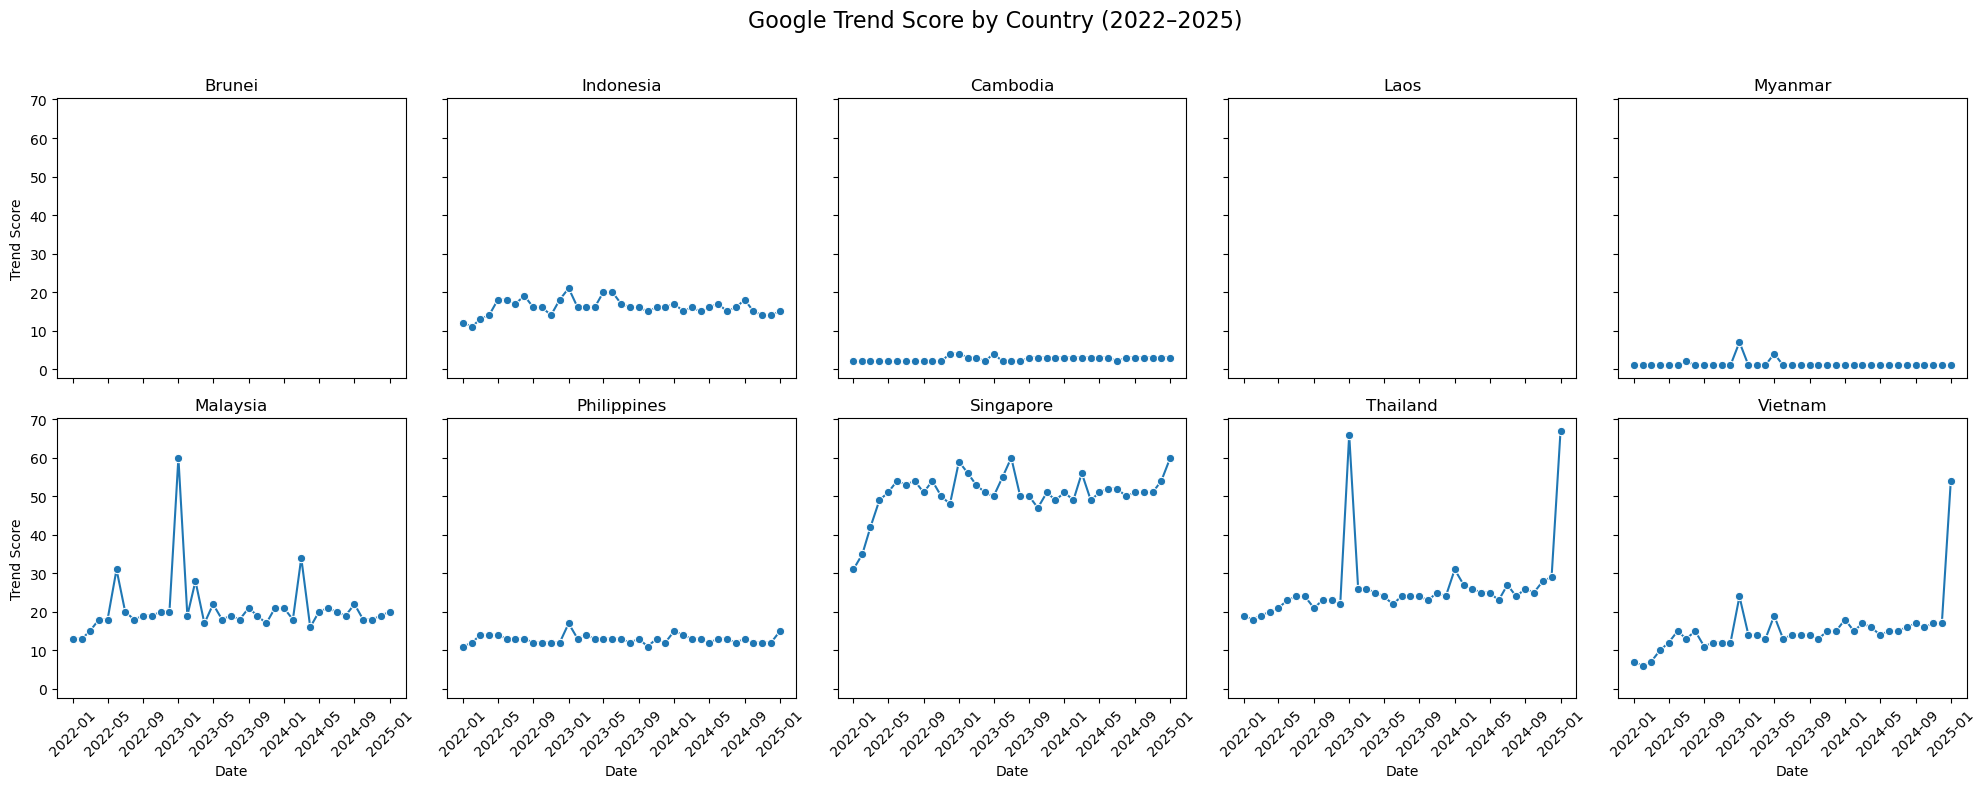

In [ ]:
# Create a 2x5 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8), sharex=True, sharey=True)
axes = axes.flatten()

# Plot trend score for each country
for i, country in enumerate(countries):
    ax = axes[i]
    country_data = final_df[final_df['country'] == country]
    sns.lineplot(
        data=country_data,
        x='month_year',
        y='google_trend_score',
        marker='o',
        ax=ax
    )
    ax.set_title(country)
    ax.set_xlabel("Date")
    ax.set_ylabel("Trend Score")
    ax.tick_params(axis='x', rotation=45)

plt.suptitle("Google Trend Score by Country (2022–2025)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


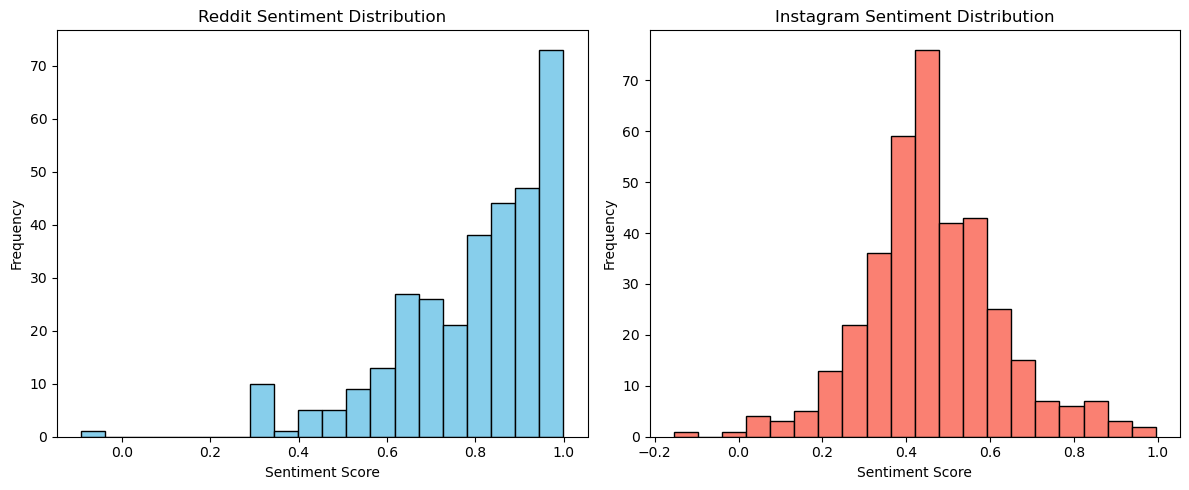

In [ ]:
# Set figure size
plt.figure(figsize=(12, 5))

# Histogram for reddit_sentiment
plt.subplot(1, 2, 1)
plt.hist(final_df['reddit_sentiment'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Reddit Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Histogram for ig_sentiment
plt.subplot(1, 2, 2)
plt.hist(final_df['ig_sentiment'].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title('Instagram Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Feature Engineering

In [ ]:
#Standardisation of volatile numeric columns
scale_cols = ["avg_currency_rate", "google_trend_score", "num_visitors", "trip_advisor_rating", "reddit_sentiment", "ig_sentiment"]

scaler = StandardScaler() 
scaled_features = scaler.fit_transform(final_df[scale_cols].fillna(0))

#outliers
final_df['avg_currency_rate'] = final_df['avg_currency_rate'].clip(upper=final_df['avg_currency_rate'].quantile(0.95))


In [ ]:
#log transform

final_df['log_visitors'] = np.log1p(final_df['num_visitors'])
final_df['log_currency'] = np.log1p(final_df['avg_currency_rate'])


In [ ]:
#classify sentiment if it helps
final_df['reddit_sentiment_label'] = pd.cut(final_df['reddit_sentiment'], bins=[-1, 0.65, 0.90, 1],
                                     labels=['under-performing', 'normal', 'outperforming'])
final_df['ig_sentiment_label'] = pd.cut(final_df['ig_sentiment'], bins=[-1, 0.4, 0.6, 1],
                                     labels=['under-performing', 'normal', 'outperforming'])

# One-hot encoding
reddit_dummies = pd.get_dummies(final_df['reddit_sentiment_label'], prefix='reddit').astype(int)
ig_dummies = pd.get_dummies(final_df['ig_sentiment_label'], prefix='ig').astype(int)

# Concatenate the new columns to final_df
final_df = pd.concat([final_df, reddit_dummies, ig_dummies], axis=1)

In [ ]:
#standardised sentiment score as separated columns with mean 0 in case you need it for some scale sensitive models?
sentiment_cols = ["reddit_sentiment", "ig_sentiment"]

standardized = scaler.fit_transform(final_df[sentiment_cols])
final_df[["reddit_sentiment_z", "ig_sentiment_z"]] = standardized


In [ ]:
#trend momentum score
final_df['google_trend_pct_change'] = final_df.groupby('country')['google_trend_score'].pct_change()


/var/folders/85/3q25ml057m51x2d6fx8s4w740000gn/T/ipykernel_72636/3477364380.py:2: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  final_df['google_trend_pct_change'] = final_df.groupby('country')['google_trend_score'].pct_change()


In [ ]:
# Flag months June (6), July (7), August (8), December (12) as holiday
final_df['is_holiday'] = final_df['month_year'].dt.month.isin([6, 7, 8, 12]).astype(int)

#Flag monsoon season
final_df['is_monsoon_season'] = final_df['month_year'].dt.month.isin([1, 2, 3, 4, 11, 12]).astype(int)


In [ ]:
# Sort by country and month_year (important for correct lagging)
final_df = final_df.sort_values(['country', 'month_year'])

# Columns to lag
lag_cols = ['google_trend_score', 'avg_currency_rate', 'reddit_sentiment', 'ig_sentiment']

# Apply the lag
for col in lag_cols:
    final_df[f'{col}_lag1'] = final_df.groupby('country')[col].shift(1)


In [ ]:
final_df.head(20)

,month_year,country,avg_currency_rate,google_trend_score,num_visitors,trip_advisor_rating,reddit_sentiment,ig_sentiment,log_visitors,log_currency,...,ig_outperforming,reddit_sentiment_z,ig_sentiment_z,google_trend_pct_change,is_holiday,is_monsoon_season,google_trend_score_lag1,avg_currency_rate_lag1,reddit_sentiment_lag1,ig_sentiment_lag1
0,2022-01-01,Brunei,1.351418,NaN,NaN,NaN,NaN,0.621856,NaN,0.855019,...,1,NaN,0.976259,NaN,0,1,NaN,NaN,NaN,NaN
10,2022-02-01,Brunei,1.348166,NaN,9526.0,NaN,NaN,0.647714,9.161885,0.853635,...,1,NaN,1.135567,NaN,0,1,NaN,1.351418,NaN,0.621856
20,2022-03-01,Brunei,1.360453,NaN,9508.0,NaN,0.90110,0.605562,9.159994,0.858854,...,1,0.595119,0.875877,NaN,0,1,NaN,1.348166,NaN,0.647714
30,2022-04-01,Brunei,1.364939,NaN,16950.0,NaN,NaN,0.533040,9.738082,0.860752,...,0,NaN,0.429094,NaN,0,1,NaN,1.360453,0.90110,0.605562
40,2022-05-01,Brunei,1.382117,NaN,36487.0,NaN,0.90110,0.667885,10.504739,0.867990,...,1,0.595119,1.259830,NaN,0,0,NaN,1.364939,NaN,0.533040
50,2022-06-01,Brunei,1.384852,NaN,44748.0,NaN,0.98780,0.534267,10.708824,0.869137,...,0,1.088947,0.436652,NaN,1,0,NaN,1.382117,0.90110,0.667885
60,2022-07-01,Brunei,1.395659,NaN,42590.0,NaN,NaN,0.530900,10.659398,0.873659,...,0,NaN,0.415911,NaN,1,0,NaN,1.384852,0.98780,0.534267
70,2022-08-01,Brunei,1.385117,NaN,82165.0,NaN,0.98780,0.371167,11.316497,0.869248,...,0,1.088947,-0.568156,NaN,1,0,NaN,1.395659,NaN,0.530900
80,2022-09-01,Brunei,1.411135,NaN,90686.0,NaN,0.29600,0.554338,11.415169,0.880098,...,0,-2.851424,0.560302,NaN,0,0,NaN,1.385117,0.98780,0.371167
90,2022-10-01,Brunei,1.425217,NaN,100231.0,5.0,NaN,0.527271,11.515243,0.885921,...,0,NaN,0.393556,NaN,0,0,NaN,1.411135,0.29600,0.554338


In [ ]:
final_df.info

<bound method DataFrame.info of     month_year  country  avg_currency_rate  google_trend_score  num_visitors  \
0   2022-01-01   Brunei           1.351418                 NaN           NaN   
10  2022-02-01   Brunei           1.348166                 NaN        9526.0   
20  2022-03-01   Brunei           1.360453                 NaN        9508.0   
30  2022-04-01   Brunei           1.364939                 NaN       16950.0   
40  2022-05-01   Brunei           1.382117                 NaN       36487.0   
..         ...      ...                ...                 ...           ...   
329 2024-09-01  Vietnam       24046.191066                17.0     1270000.0   
339 2024-10-01  Vietnam       24046.191066                16.0     1420000.0   
349 2024-11-01  Vietnam       24046.191066                17.0     1710000.0   
359 2024-12-01  Vietnam       24046.191066                17.0     1750000.0   
369 2025-01-01  Vietnam       24046.191066                54.0     2070000.0   

     tr